# **Importing Libraries**

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# **Load the Dataset**


In [3]:
data_train = pd.read_csv("/home/ilaf/Desktop/ML projects/homeLoanApproval/dataSource/loan_sanction_train.csv", encoding_errors = "ignore")
data_test = pd.read_csv("/home/ilaf/Desktop/ML projects/homeLoanApproval/dataSource/loan_sanction_test.csv", encoding_errors = "ignore")

In [4]:
print("Shape of data : ",data_train.shape)
print("Shape of data : ",data_test.shape)

Shape of data :  (614, 13)
Shape of data :  (367, 12)


# **Data Exploration  and Preprocessing**

In [5]:
data_train.describe(include = "all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


- In trainnning data most of features are supposed to have null values.

- Most of categorical features, most of them has 2 categories.

- In ApplicantIncome the difference between 50% to 75% is almost double as compared to 25% to 50%.It is likely to be rightskew distribution in trainig data as we can see almost 40X scale from min - 25%  to 75% - max.

- Inconsistency in data : credit history

    0: no credit history
    
    1: credit histroty
    

- It should be "object" type but is present as "float". It should be reverter  

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


For both train and test data there are a lot of null values and credit history remain inconsistent for both.

In [8]:
# Type casting for Loan_Amount_Term
data_train["Loan_Amount_Term"] = data_train["Loan_Amount_Term"].astype(object)
data_test["Loan_Amount_Term"] = data_test["Loan_Amount_Term"].astype(object)

In [9]:
# Type casting for credit history
data_train["Credit_History"] = data_train["Credit_History"].astype(object)
data_test["Credit_History"] = data_test["Credit_History"].astype(object)

In [10]:
data_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term      object
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
data_test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term      object
Credit_History        object
Property_Area         object
dtype: object

In [165]:
data_train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [12]:
data_train["Credit_History"].value_counts(),data_test["Credit_History"].value_counts()

(1.0    475
 0.0     89
 Name: Credit_History, dtype: int64,
 1.0    279
 0.0     59
 Name: Credit_History, dtype: int64)

As we observe imbalance data distribution in credit history we need to check for other caterogical features.

In [13]:
def seperate_columns_numerical_categorical(data):
    categorical_cols, numerical_cols = [], []
    for col in data.columns:
        if data[col].dtypes == "object":
            categorical_cols.append(col)
        else:
            numerical_cols.append(col)
    return categorical_cols, numerical_cols

In [14]:
categorical_cols, numerical_cols = seperate_columns_numerical_categorical(data_train)
print("\nCategorical columns : ", categorical_cols)
print("\nNumerical columns : " , numerical_cols)


Categorical columns :  ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

Numerical columns :  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


In [15]:
for col in categorical_cols:
    print("*"*50)
    print("The value counts for {} is :".format(col))
    print("\n")
    print(data_train[col].value_counts())
    print("\n")
    print("*"*50)

**************************************************
The value counts for Loan_ID is :


LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64


**************************************************
**************************************************
The value counts for Gender is :


Male      489
Female    112
Name: Gender, dtype: int64


**************************************************
**************************************************
The value counts for Married is :


Yes    398
No     213
Name: Married, dtype: int64


**************************************************
**************************************************
The value counts for Dependents is :


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


**************************************************
**************************************************
The value counts

- As we can see that in our data the target variable has imbalanced class distribution hence, Accuracy might not be an ideal performence metric.

- However, some oversampling / undersampling can help in getting a close bias-var trade off.

- Apart from that we will be validating Precsion Recall , Confusion Matrix and AUC-ROC scores to validate and finalise our model.

In [16]:
data_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
data_test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

- As there are a lot of null values, hence, we will be imputing categorical null counts with their respective feature modes.

- Similary for numerical features we will use mean / median as our central tendency metric.

- We will not be droping our data because it may result in a huge data loss alotogether.

In [18]:
categorical_list = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Amount_Term' ] 

def filling_null_values(categorical_list, numerical_cols,data):
    for col in categorical_list:
        if data[col].isna().sum() > 0:
            data[col].fillna(data[col].mode()[0], inplace = True)
    for col in numerical_cols:
        if data[col].isna().sum() > 0:
            data[col].fillna(np.mean(data[col]), inplace = True)


In [19]:
filling_null_values(categorical_list, numerical_cols,data_train)
filling_null_values(categorical_list, numerical_cols,data_test)

In [20]:
data_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
data_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# **Exploratory Data Analysis**

## **Univariate Analysis (Categorical Features)**

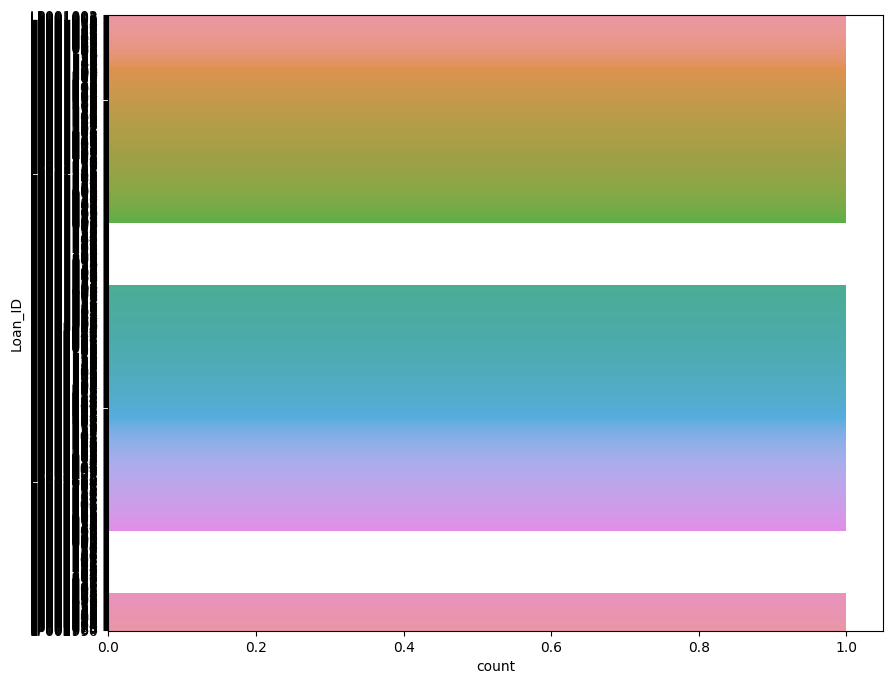

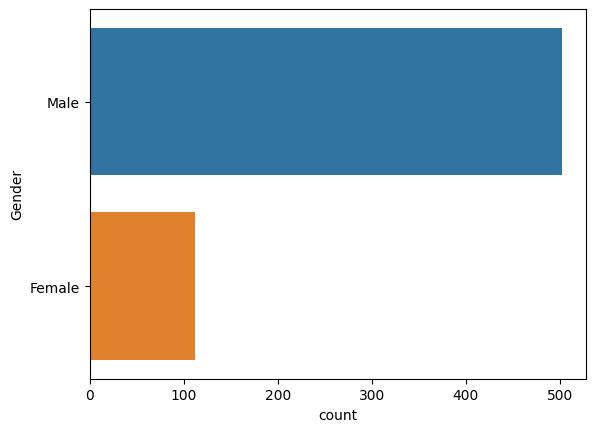

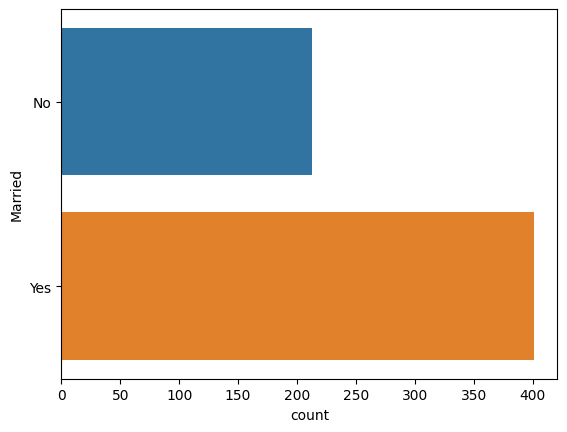

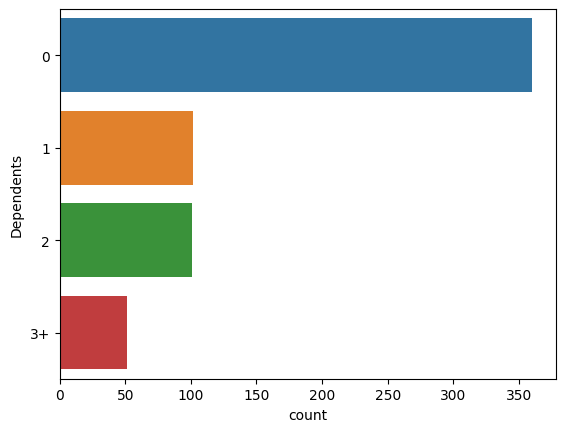

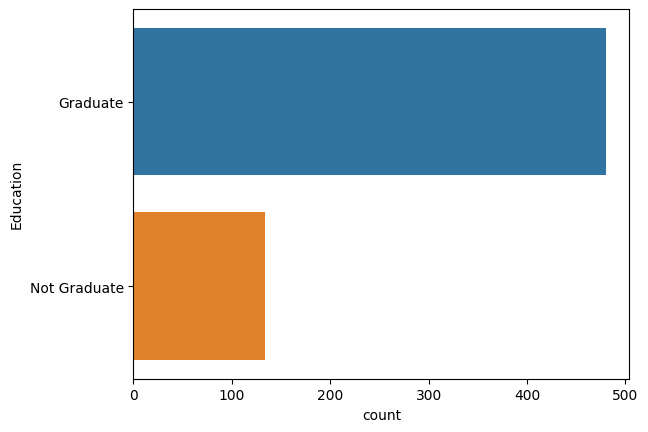

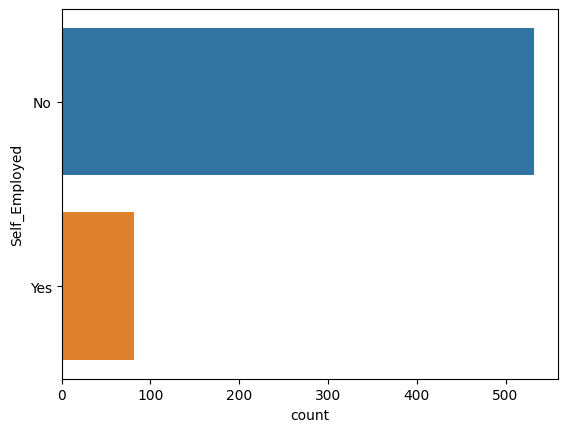

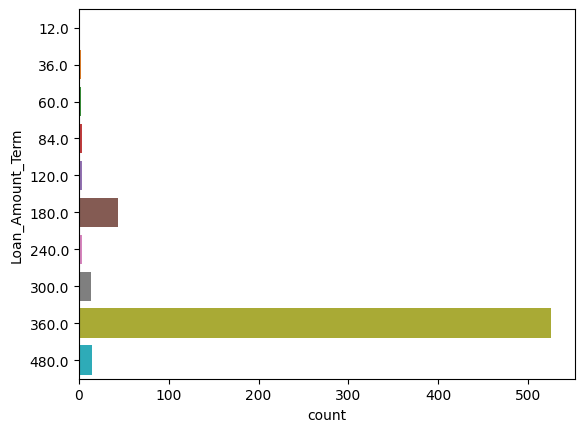

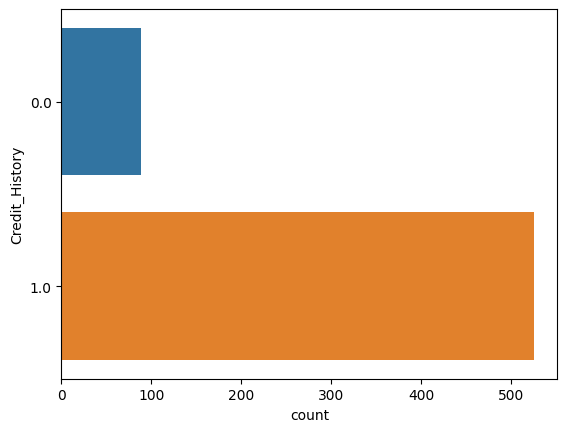

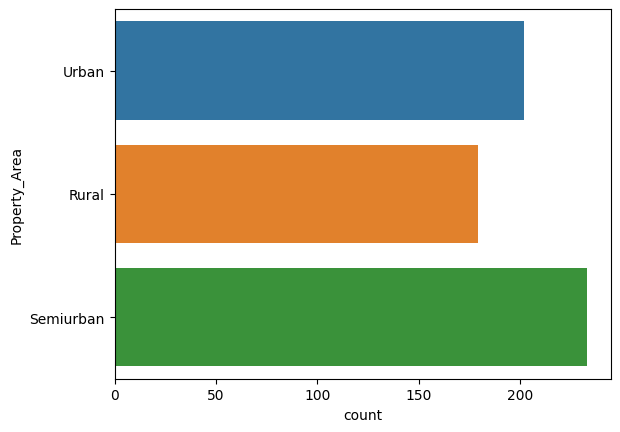

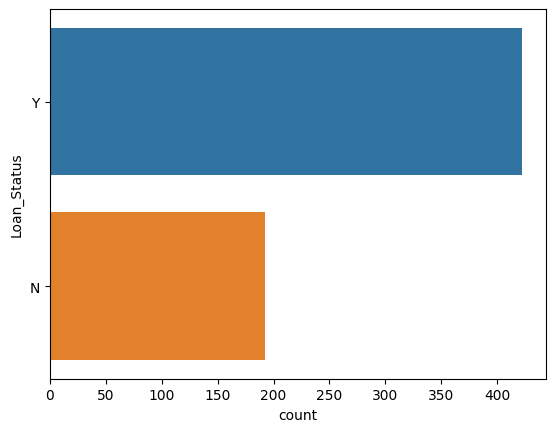

In [22]:
plt.figure(figsize = [10,8])
for col in categorical_cols:
    sns.countplot(data = data_train,y = col)
    plt.show();


- People who have taken previous loans are reported maximum number of times.

- The highest count of records are from  Semiurban properties.

- People who had previous credit history are reported maximum number of times.

- Most of the loan applicants already have a 360 months tenured loan ongoing.

- Most of loan applications are of salaried employees.

- Most of the applications are of graduates.

- Most of the applications have no dependencies.

- People who are married are applying more for the loan.

- The count for male applications are comparively higher than that of females.

## **Univariate Analysis (Numerical Features)**


In [23]:
data_train[data_train["CoapplicantIncome"] == 0.00000000e+00].index

Int64Index([  0,   2,   4,  15,  16,  17,  18,  20,  25,  28,
            ...
            595, 597, 598, 599, 602, 604, 609, 610, 612, 613],
           dtype='int64', length=273)

In [24]:
for index in data_train[data_train["CoapplicantIncome"] == 0.00000000e+00].index:
    data_train["CoapplicantIncome"][index] = np.mean(data_train["CoapplicantIncome"])

/tmp/ipykernel_36327/4286421289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train["CoapplicantIncome"][index] = np.mean(data_train["CoapplicantIncome"])


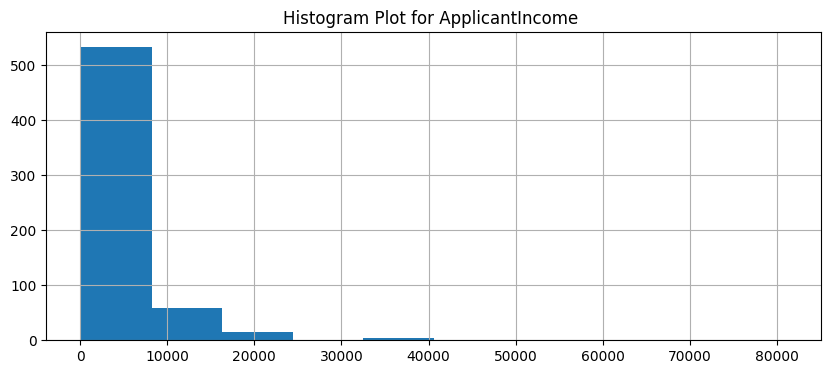

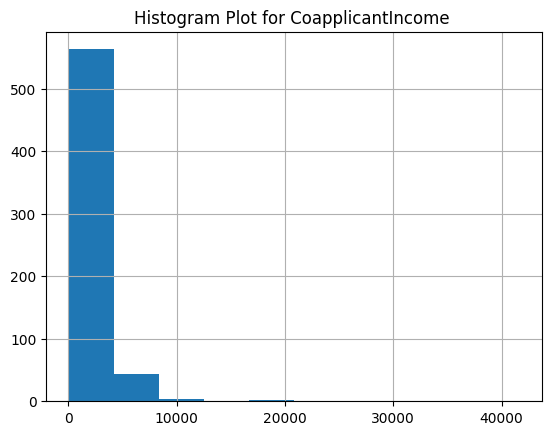

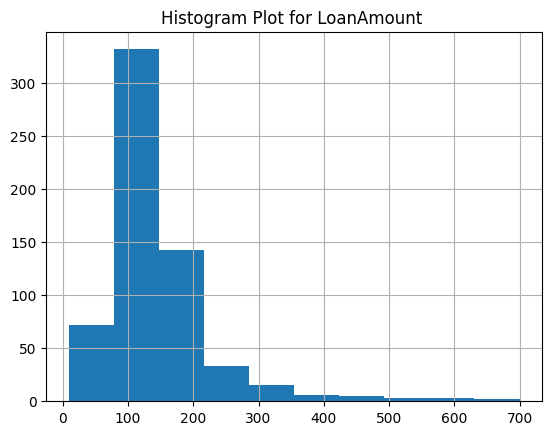

In [25]:
plt.figure(figsize = [10,4])
for col in numerical_cols:
    plt.hist(data_train[col]);
    plt.grid();
    plt.title("Histogram Plot for {} ".format(col))
    plt.show();


- All of the features they are having a right-skewed distribution.

- This means that these features are highly sensitive to outliers / noise data.

- Changing these features to log scale by using log trainsformation or using box-cox method may centralise the plots.

In [26]:
data_train["CoapplicantIncome"].values

array([1.62124580e+03, 1.50800000e+03, 1.62388626e+03, 2.35800000e+03,
       1.62653103e+03, 4.19600000e+03, 1.51600000e+03, 2.50400000e+03,
       1.52600000e+03, 1.09680000e+04, 7.00000000e+02, 1.84000000e+03,
       8.10600000e+03, 2.84000000e+03, 1.08600000e+03, 1.62918010e+03,
       1.63183349e+03, 1.63449120e+03, 1.63715324e+03, 3.50000000e+03,
       1.63981961e+03, 5.62500000e+03, 1.91100000e+03, 1.91700000e+03,
       2.92500000e+03, 1.64249033e+03, 2.25300000e+03, 1.04000000e+03,
       1.64516539e+03, 2.08300000e+03, 3.36900000e+03, 1.64784482e+03,
       1.65052860e+03, 1.66700000e+03, 3.00000000e+03, 2.06700000e+03,
       1.33000000e+03, 1.45900000e+03, 7.21000000e+03, 1.66800000e+03,
       1.65321676e+03, 1.21300000e+03, 1.65590929e+03, 2.33600000e+03,
       1.65860621e+03, 1.66130753e+03, 1.66401324e+03, 1.66672336e+03,
       3.44000000e+03, 2.27500000e+03, 1.64400000e+03, 1.66943789e+03,
       1.67215685e+03, 1.67488023e+03, 1.67760805e+03, 1.16700000e+03,
      

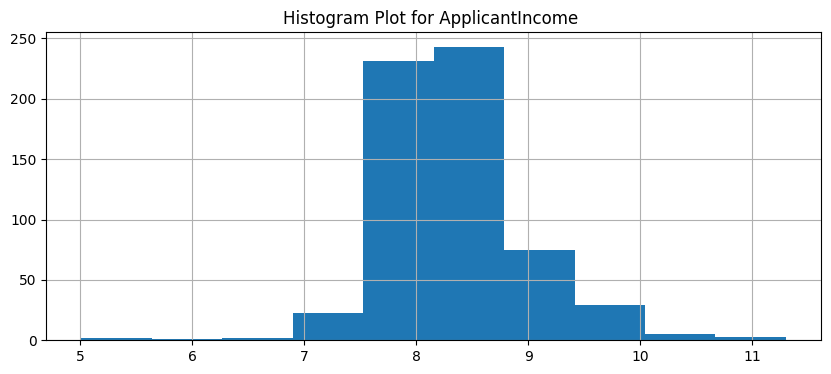

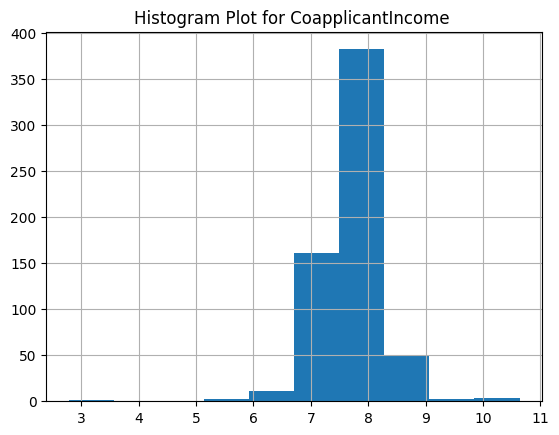

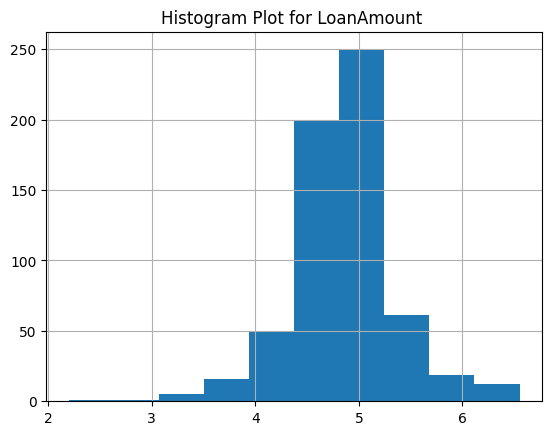

In [27]:
plt.figure(figsize = [10,4])
for col in numerical_cols:
    plt.hist(np.log(data_train[col].values));
    plt.grid();
    plt.title("Histogram Plot for {} ".format(col))
    plt.show();

In [28]:
# making a dataframe in the log scale of the continious variables.

data_train_log = data_train.copy()
data_test_log = data_test.copy()

data_train_log[data_train_log["CoapplicantIncome"] == 0.00000000e+00].index
for index in data_train_log[data_train_log["CoapplicantIncome"] == 0.00000000e+00].index:
    data_train_log["CoapplicantIncome"][index] = np.mean(data_train_log["CoapplicantIncome"])

data_test_log[data_test_log["CoapplicantIncome"] == 0.00000000e+00].index
for index in data_test_log[data_test_log["CoapplicantIncome"] == 0.00000000e+00].index:
    data_test_log["CoapplicantIncome"][index] = np.mean(data_test_log["CoapplicantIncome"])

/tmp/ipykernel_36327/3931304318.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test_log["CoapplicantIncome"][index] = np.mean(data_test_log["CoapplicantIncome"])


In [29]:
for col in numerical_cols:
    data_train_log[col] = np.log(data_train_log[col])
    data_test_log[col] = np.log(data_test_log[col])

/home/ilaf/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


# **Bi-Variate Analysis**

In [30]:
data_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

**How does Education impacts the loan status ?**

In [31]:
data_train.groupby(["Education",'Loan_Status'])['Loan_Status'].count()

Education     Loan_Status
Graduate      N              140
              Y              340
Not Graduate  N               52
              Y               82
Name: Loan_Status, dtype: int64

**How does Credit history impacts the loan status ?**

In [32]:
data_train.groupby(['Credit_History','Loan_Status'])['Loan_Status'].count()

Credit_History  Loan_Status
0.0             N               82
                Y                7
1.0             N              110
                Y              415
Name: Loan_Status, dtype: int64

**What is the likelihood of getting a loan if someone has an education as well they have a previous credit history?**

In [33]:
data_train.groupby(['Education','Credit_History','Loan_Status'])['Loan_Status'].count()

Education     Credit_History  Loan_Status
Graduate      0.0             N               57
                              Y                6
              1.0             N               83
                              Y              334
Not Graduate  0.0             N               25
                              Y                1
              1.0             N               27
                              Y               81
Name: Loan_Status, dtype: int64

- Amongst the graduates there are 340 people who are eligable for loan.
- People who are not graduate amongst them 82 people are eligable for a loan.
- The majority who dont have a previous credit history are not getting loans however, there are 7 people who have recieved the loan.
- If someone has a previous credit score then there lies an almost 80% chance that they will get a loan.
- If one is a graduate and has an active credit history in that case the chance of getting a loan is around 54%

**What is the chance of getting a loan given that the person is self-employed and has a previous history of credit?**

In [34]:
data_train.groupby([ 'Self_Employed' ,  'Credit_History' , 'Loan_Status'])['Loan_Status'].count()

Self_Employed  Credit_History  Loan_Status
No             0.0             N               70
                               Y                7
               1.0             N               96
                               Y              359
Yes            0.0             N               12
               1.0             N               14
                               Y               56
Name: Loan_Status, dtype: int64

<Axes: xlabel='count', ylabel='Self_Employed'>

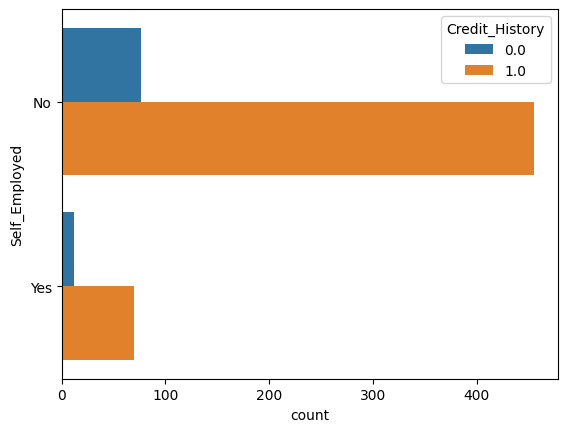

In [35]:
sns.countplot(data = data_train, y = "Self_Employed", hue = "Credit_History")

- If a person is not self employed i.e, the person is salaried and has a history of credit already then the person is likely to have a greater chance of getting a loan.

- On the other hand If a person is not self employed i.e, the person is salaried in that case if he/she does'nt have an history of credit then, the likelihood of getting a loan is least.i.e, nearly 1.15%

**What insights can be formed from the teniority of the loan and its average loan amount?**

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

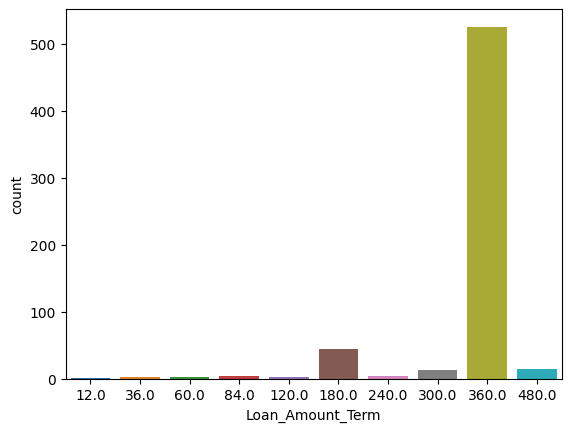

In [36]:
sns.countplot(data= data_train,x = 'Loan_Amount_Term')

<Axes: xlabel='LoanAmount', ylabel='Count'>

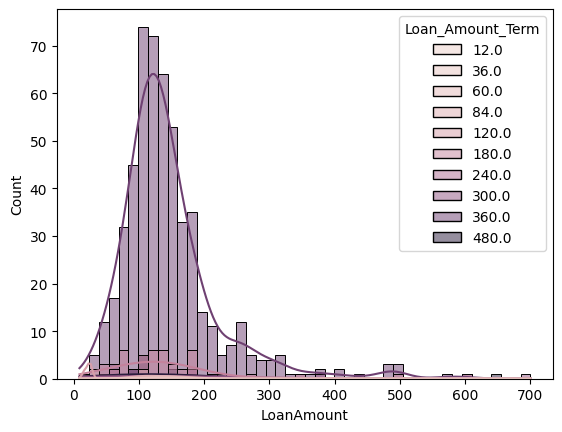

In [37]:
sns.histplot(data= data_train, x = "LoanAmount", hue = 'Loan_Amount_Term', kde = True)

/tmp/ipykernel_36327/4174573412.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data= data_train,


<Axes: xlabel='LoanAmount', ylabel='Density'>

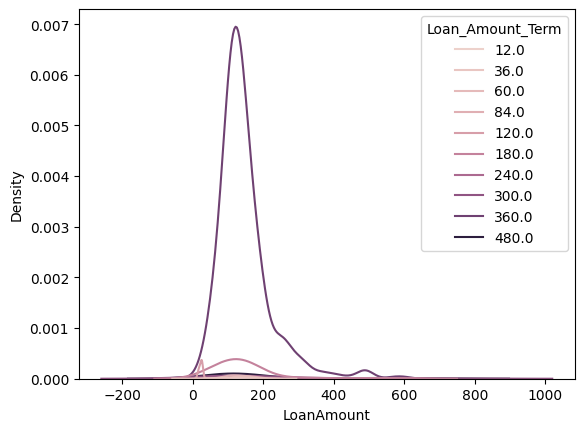

In [38]:
sns.kdeplot(data= data_train,
             x = "LoanAmount",
             hue = 'Loan_Amount_Term')

In [39]:
data_train.groupby(['Loan_Amount_Term'])["LoanAmount"].agg([np.mean,np.median])

,mean,median
Loan_Amount_Term,,
12.0,111.000000,111.000000
36.0,117.500000,117.500000
60.0,140.000000,140.000000
84.0,132.250000,126.000000
120.0,22.333333,25.000000
180.0,147.473280,127.000000
240.0,125.353041,123.206081
300.0,185.153846,124.000000
360.0,146.389413,130.000000


In [40]:
data_grouped_by_term_avg_loan_amount = data_train.groupby(['Loan_Amount_Term'])["LoanAmount"].agg([np.mean])

In [41]:
data_grouped_by_term_avg_loan_amount.index

Float64Index([12.0, 36.0, 60.0, 84.0, 120.0, 180.0, 240.0, 300.0, 360.0,
              480.0],
             dtype='float64', name='Loan_Amount_Term')

In [42]:
data_grouped_by_term_avg_loan_amount.values

array([[111.        ],
       [117.5       ],
       [140.        ],
       [132.25      ],
       [ 22.33333333],
       [147.4732801 ],
       [125.35304054],
       [185.15384615],
       [146.3894127 ],
       [151.8       ]])

In [43]:
index = []
for i in data_grouped_by_term_avg_loan_amount.index:
    print(i)
    index.append(i)
    

12.0
36.0
60.0
84.0
120.0
180.0
240.0
300.0
360.0
480.0


In [44]:
values = []
for i in data_grouped_by_term_avg_loan_amount.values:
    for j in i :
        print(j)
        values.append(j)

111.0
117.5
140.0
132.25
22.333333333333332
147.4732800982801
125.35304054054055
185.15384615384616
146.38941270167507
151.8


Text(0, 0.5, 'Average loan term amount')

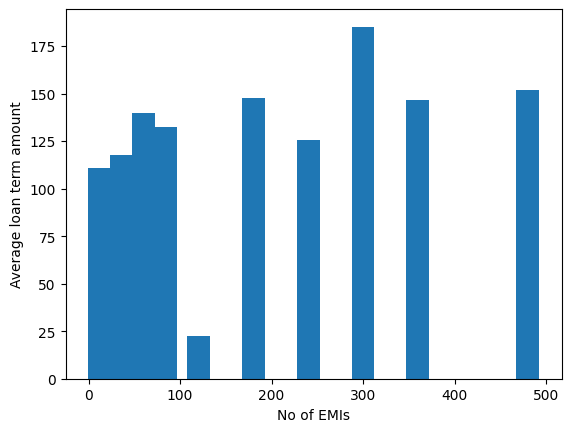

In [45]:
plt.bar(index,values, width = 25)
plt.xlabel("No of EMIs")
plt.ylabel("Average loan term amount")

**How does the Applicant Income impact the LoanAmount ?**

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

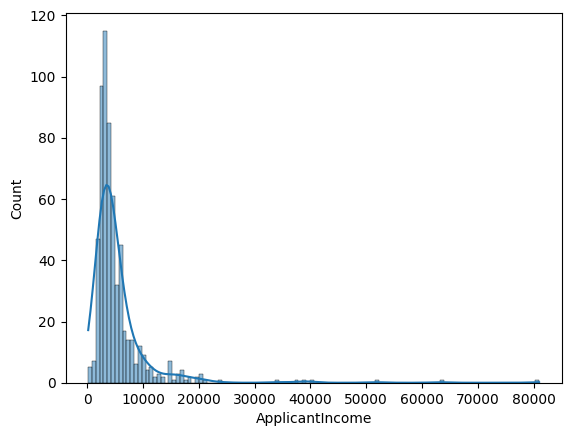

In [46]:
sns.histplot(data = data_train,
             x = "ApplicantIncome",
             kde= True)

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

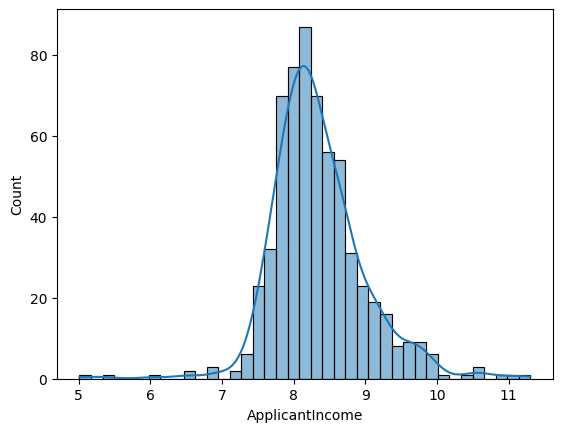

In [47]:
sns.histplot(data = data_train_log,
             x = "ApplicantIncome",
             kde= True)

In [48]:
data_train["LoanAmount"]

0      146.412162
1      128.000000
2       66.000000
3      120.000000
4      141.000000
          ...    
609     71.000000
610     40.000000
611    253.000000
612    187.000000
613    133.000000
Name: LoanAmount, Length: 614, dtype: float64

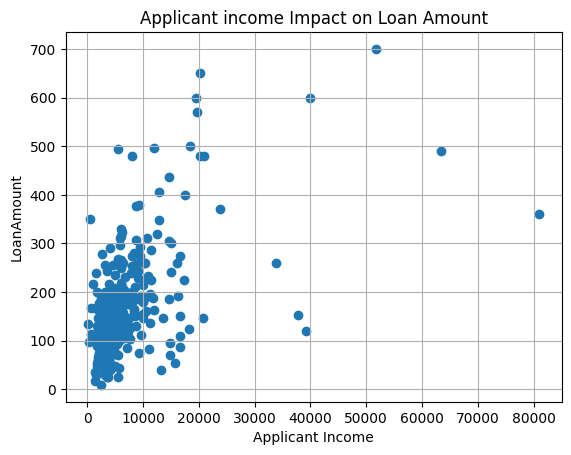

In [49]:
plt.scatter(data_train['ApplicantIncome'],
            data_train['LoanAmount'])
plt.xlabel("Applicant Income")
plt.ylabel("LoanAmount")
plt.grid();
plt.title("Applicant income Impact on Loan Amount");
plt.show();


- People with a low income range seek to take a greater loan. The number of persons in this range is way higher than people who are making a greater amount of paycheck.

**Average income of people who are taking a greater loan ?**

In [50]:
data_train.groupby(by='Loan_Amount_Term')['ApplicantIncome'].agg([np.mean,np.median])

,mean,median
Loan_Amount_Term,,
12.0,4625.000000,4625.0
36.0,3419.500000,3419.5
60.0,5032.500000,5032.5
84.0,4128.500000,3804.5
120.0,2792.666667,3459.0
180.0,6927.886364,3836.0
240.0,5907.750000,4994.0
300.0,8184.923077,3500.0
360.0,5267.028517,3848.0


**How does Property_Area impacts the loan status ?**

In [51]:
data_train.groupby(["Property_Area",'Loan_Status'])['Loan_Status'].count()

Property_Area  Loan_Status
Rural          N               69
               Y              110
Semiurban      N               54
               Y              179
Urban          N               69
               Y              133
Name: Loan_Status, dtype: int64

- In semiurban area maximum number of of loan in approved.

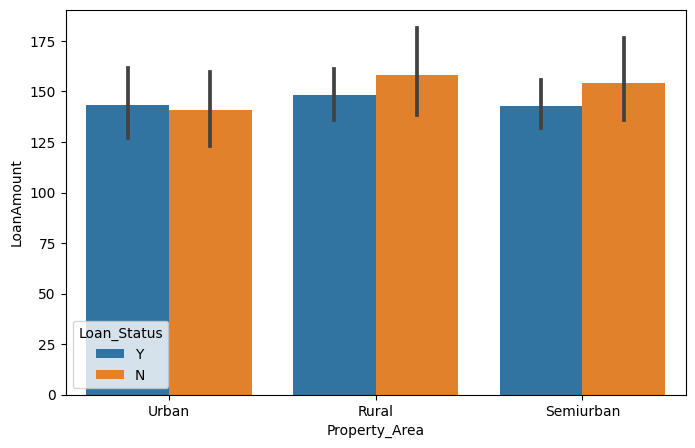

In [52]:
plt.figure(figsize = [8,5])
sns.barplot(data = data_train, hue = "Loan_Status", y = "LoanAmount", x = "Property_Area")
plt.show()

- Maximum LoanAmount is in rural area which is mostly is rejected.

**How does Genderwise marital status impacts the loan status ?**

In [53]:
data_train.groupby(['Gender','Married','Loan_Status'])['Loan_Status'].count()

Gender  Married  Loan_Status
Female  No       N               29
                 Y               51
        Yes      N                8
                 Y               24
Male    No       N               50
                 Y               83
        Yes      N              105
                 Y              264
Name: Loan_Status, dtype: int64

- Married males are most eligible for loans.
- Among females nonmarried are mostly eligible for loans.

**How does Genderwise dependents impacts the loan status ?**

In [54]:
data_train.groupby(['Gender','Dependents', 'Loan_Status'])['Loan_Status'].count()

Gender  Dependents  Loan_Status
Female  0           N               27
                    Y               56
        1           N                6
                    Y               13
        2           N                2
                    Y                5
        3+          N                2
                    Y                1
Male    0           N               86
                    Y              191
        1           N               30
                    Y               53
        2           N               23
                    Y               71
        3+          N               16
                    Y               32
Name: Loan_Status, dtype: int64

- Among male and female people with 0 dependents are most eligible for loan and people with 3+ dependents are most eligible for loan.


**How does Genderwise selfemployed impacts the loan status ?**

In [55]:
data_train.groupby(['Gender','Self_Employed','Loan_Status'])['Loan_Status'].count()

Gender  Self_Employed  Loan_Status
Female  No             N               31
                       Y               66
        Yes            N                6
                       Y                9
Male    No             N              135
                       Y              300
        Yes            N               20
                       Y               47
Name: Loan_Status, dtype: int64

- people who are not self employed are most likely to get loans weather male or female.

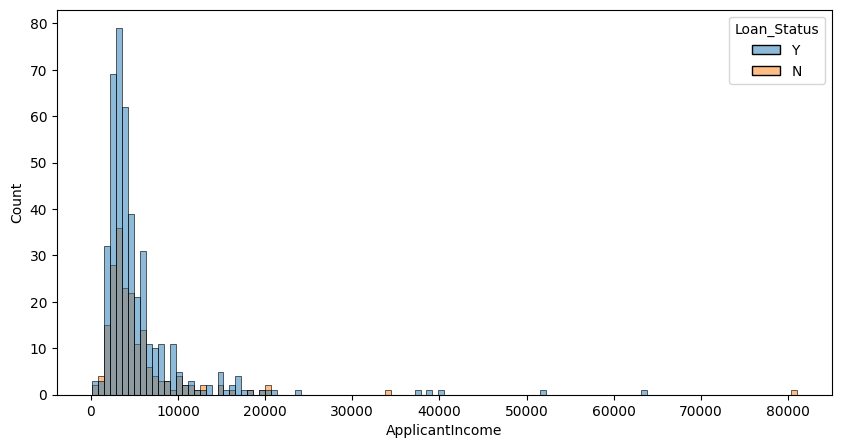

In [56]:
plt.figure(figsize=(10,5))
sns.histplot(data_train,x='ApplicantIncome',hue='Loan_Status');


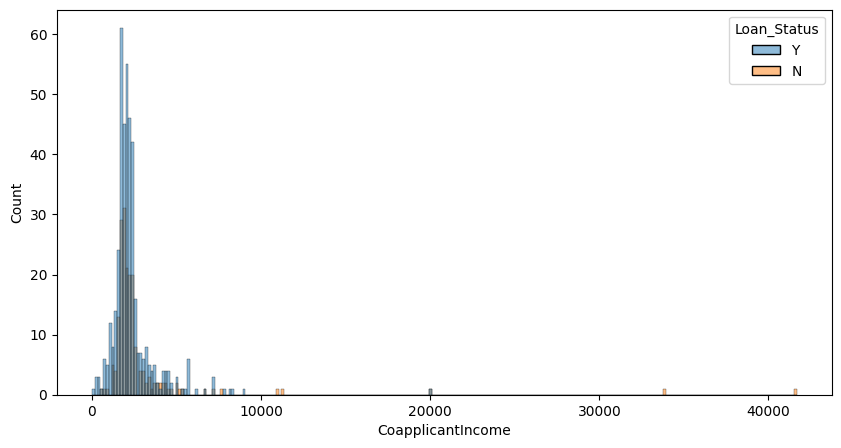

In [57]:
plt.figure(figsize=(10,5))
sns.histplot(data_train,x='CoapplicantIncome',hue='Loan_Status');


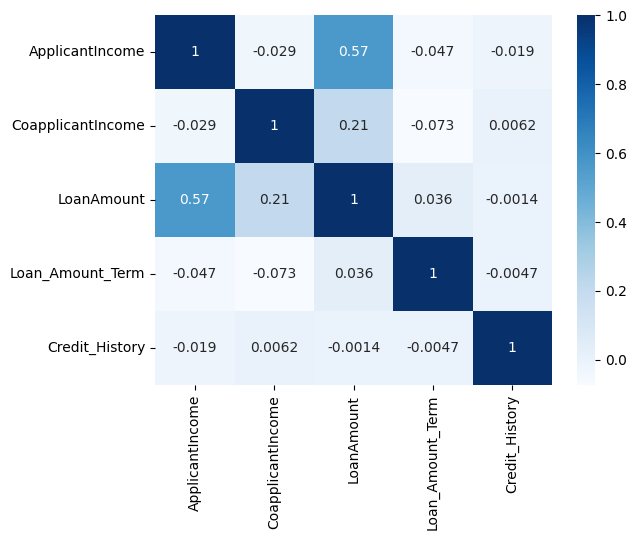

In [58]:
sns.heatmap(data_train.corr(),annot=True,cmap='Blues');

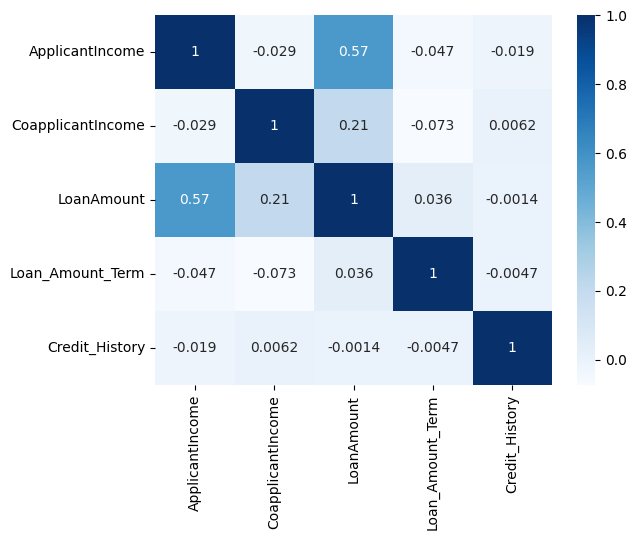

In [59]:
sns.heatmap(data_train.corr(method = 'pearson'),annot=True,cmap='Blues');

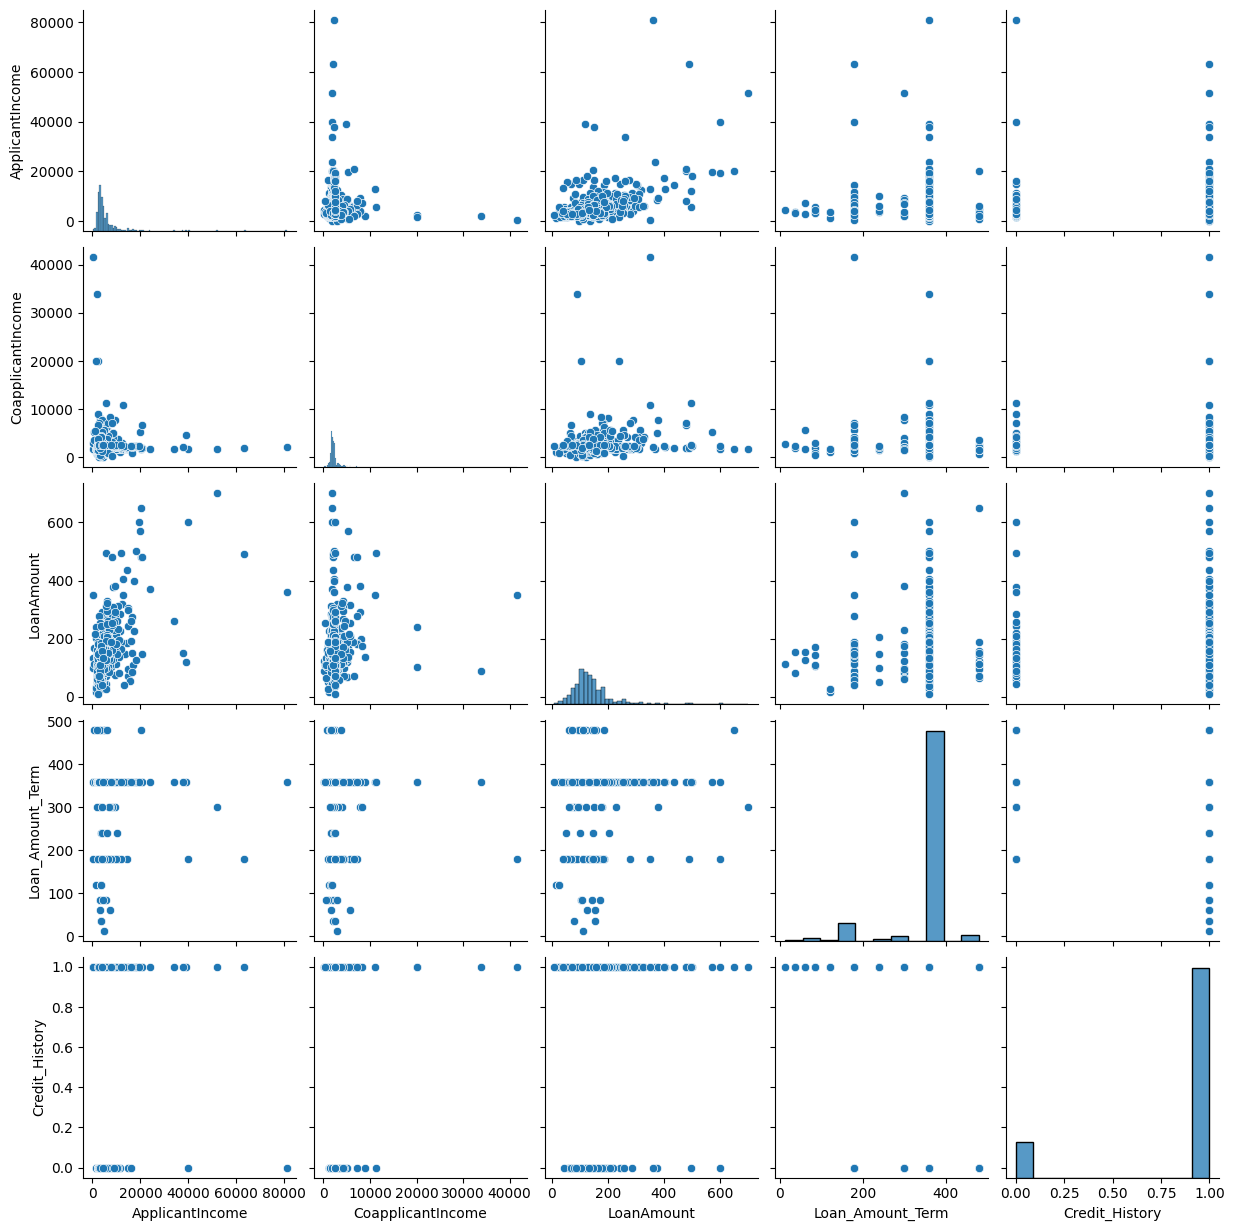

In [60]:
sns.pairplot(data_train)

# Data Postprocessing

**Approaches on data postprocessing**

1. Perform LabelEncoding on the categorical features on the main data (data_train and data_test).
2. Perform LabelEncoding on the categorical features on the log-scaled data (data_train_log and data_test_log).
3. Perform OneHotEncoding on the categorical features on the main data (data_train and data_test).
4. Perform OneHotEncoding on the categorical features on the log-scaled data (data_train_log and data_test_log). 

In [61]:
categorical_cols

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [62]:
# Remove 'Loan_ID'

data_train.drop("Loan_ID", axis=1, inplace = True)
data_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,1621.245798,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.000000,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,1623.886263,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,1626.531029,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,2511.673423,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,2515.764096,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.000000,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,2519.861432,187.000000,360.0,1.0,Urban,Y


In [63]:
data_train_log.drop("Loan_ID", axis=1, inplace = True)
data_train_log

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674026,7.390950,4.986426,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,8.430109,7.318540,4.852030,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,8.006368,7.392577,4.189655,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,7.856707,7.765569,4.787492,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,8.699515,7.394205,4.948760,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,7.972466,7.828705,4.262680,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,8.320205,7.830332,3.688879,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8.996157,5.480639,5.533389,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,8.933664,7.831959,5.231109,360.0,1.0,Urban,Y


In [64]:
#data_test.drop("Loan_ID", axis=1, inplace = True)
data_test.drop("Loan_ID", axis=1, inplace = True)
data_train_log

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674026,7.390950,4.986426,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,8.430109,7.318540,4.852030,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,8.006368,7.392577,4.189655,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,7.856707,7.765569,4.787492,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,8.699515,7.394205,4.948760,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,7.972466,7.828705,4.262680,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,8.320205,7.830332,3.688879,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8.996157,5.480639,5.533389,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,8.933664,7.831959,5.231109,360.0,1.0,Urban,Y


In [65]:
#data_test.drop("Loan_ID", axis=1, inplace = True)
data_test_log.drop("Loan_ID", axis=1, inplace = True)
data_train_log

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674026,7.390950,4.986426,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,8.430109,7.318540,4.852030,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,8.006368,7.392577,4.189655,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,7.856707,7.765569,4.787492,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,8.699515,7.394205,4.948760,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,7.972466,7.828705,4.262680,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,8.320205,7.830332,3.688879,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8.996157,5.480639,5.533389,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,8.933664,7.831959,5.231109,360.0,1.0,Urban,Y


# Data Encoding

In [66]:
encoder = LabelEncoder()

In [67]:
# Label Encoded features for all log scaled data
data_train_log_labelencoded = data_train_log.copy()
data_test_log_labelencoded = data_test_log.copy()

# Label Encoded features for all re scaled data
data_train_labelencoded = data_train.copy()
data_test_labelencoded = data_test.copy()

# One-Hot-Encoded features for all log scaled data
data_train_log_onehotencoded = data_train_log.copy()
data_test_log_onehotencoded = data_test_log.copy()

# One-Hot-Encoded features for all re scaled data
data_train_onehotencoded = data_train.copy()
data_test_onehotencoded = data_test.copy()

In [68]:
 
categorical_cols = ['Gender',
                    'Married',
                    'Dependents',
                    'Education',
                    'Self_Employed',
                    'Loan_Amount_Term',
                    'Credit_History',
                    'Property_Area']

In [69]:
# Performing Label Encoding:

for col in categorical_cols:
    data_train_log_labelencoded[col] = encoder.fit_transform(data_train_log_labelencoded[col])
    data_test_log_labelencoded[col] = encoder.fit_transform(data_test_log_labelencoded[col])
    data_train_labelencoded[col] = encoder.fit_transform(data_train_labelencoded[col])
    data_test_labelencoded[col] = encoder.fit_transform(data_test_labelencoded[col])

In [70]:
# Performing One Hot Encoding:
target = data_train_onehotencoded["Loan_Status"]
data_train_log_onehotencoded.drop(["Loan_Status"], axis =1, inplace = True)
data_train_onehotencoded.drop(["Loan_Status"], axis =1, inplace = True)


data_train_log_onehotencoded = pd.get_dummies(data_train_log_onehotencoded)
data_test_log_onehotencoded = pd.get_dummies(data_test_log_onehotencoded)
data_train_onehotencoded = pd.get_dummies(data_train_onehotencoded)
data_test_onehotencoded = pd.get_dummies(data_test_onehotencoded)

In [71]:
target = encoder.fit_transform(target)

In [72]:
data_train_log_labelencoded.shape, data_test_log_labelencoded.shape

((614, 12), (367, 11))

In [73]:
data_train_labelencoded.shape, data_test_labelencoded.shape

((614, 12), (367, 11))

In [74]:
data_train_log_onehotencoded.shape, data_test_log_onehotencoded.shape

((614, 20), (367, 20))

In [75]:
data_train_onehotencoded.shape, data_test_onehotencoded.shape

((614, 20), (367, 20))

# Train-Test split

In [76]:
# Making train test split


In [77]:
x_log_label = data_train_log_labelencoded.drop(["Loan_Status"], axis =1)
y_log_label = data_train_log_labelencoded["Loan_Status"]

x_train_log_label,x_test_log_label,y_train_log_label,y_test_log_label = train_test_split(x_log_label,y_log_label, test_size = 0.20)

In [78]:
x_train_log_label.shape,x_test_log_label.shape,y_train_log_label.shape,y_test_log_label.shape

((491, 11), (123, 11), (491,), (123,))

In [79]:
x_label = data_train_labelencoded.drop(["Loan_Status"],axis =1)
y_label = data_train_labelencoded["Loan_Status"]

x_train_label,x_test_label,y_train_label,y_test_label = train_test_split(x_label,y_label, test_size = 0.20)

In [80]:
x_train_label.shape,x_test_label.shape,y_train_label.shape,y_test_label.shape

((491, 11), (123, 11), (491,), (123,))

In [81]:
x_log_onehot = data_train_log_onehotencoded
y_log_onehot = target

x_train_log_onehot,x_test_log_onehot,y_train_log_onehot,y_test_log_onehot = train_test_split(x_log_onehot,y_log_onehot, test_size = 0.20)

In [82]:
x_train_log_onehot.shape,x_test_log_onehot.shape,y_train_log_onehot.shape,y_test_log_onehot.shape

((491, 20), (123, 20), (491,), (123,))

In [83]:
x_onehot = data_train_onehotencoded
y_onehot = target

x_train_onehot,x_test_onehot,y_train_onehot,y_test_onehot = train_test_split(x_onehot,y_onehot, test_size = 0.20)

In [84]:
x_train_onehot.shape,x_test_onehot.shape,y_train_onehot.shape,y_test_onehot.shape

((491, 20), (123, 20), (491,), (123,))

# Modelling

In [85]:
log_reg =  LogisticRegression()
knn =  KNeighborsClassifier()
dtc =  DecisionTreeClassifier()
clf =  SVC()
rfc = RandomForestClassifier()

models = [log_reg, knn, dtc, clf, rfc]

In [86]:
def trainning_data(x_train, y_train, x_test):
    model_name_list = []
    pred_list = []
    for model in models:
        print(model)
        model.fit(x_train, y_train)
        prediction = model.predict(x_test)
        model_name_list.append(model)
        pred_list.append(prediction)
    pred_df = pd.DataFrame({"Model Name ": model_name_list,
                          "prediction": pred_list})
    return pred_df

In [87]:
prediction_log_label = trainning_data(x_train_log_label,y_train_log_label,x_test_log_label)

LogisticRegression()
KNeighborsClassifier()
DecisionTreeClassifier()
SVC()
RandomForestClassifier()


In [88]:
prediction_label = trainning_data(x_train_label,y_train_label,x_test_label)

LogisticRegression()
KNeighborsClassifier()
DecisionTreeClassifier()
SVC()
RandomForestClassifier()


In [89]:
prediction_log_onehot = trainning_data(x_train_log_onehot,y_train_log_onehot,x_test_log_onehot)


LogisticRegression()
KNeighborsClassifier()
DecisionTreeClassifier()
SVC()
RandomForestClassifier()


/home/ilaf/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [90]:
prediction_onehot = trainning_data(x_train_onehot,y_train_onehot,x_test_onehot)


LogisticRegression()
KNeighborsClassifier()
DecisionTreeClassifier()
SVC()
RandomForestClassifier()


/home/ilaf/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [91]:
def acc_score(pred, y_test):
    model_name_list, acc_list = [], []
    for model in pred.index:
        acc = accuracy_score(pred['prediction'][model], y_test)
        model_name_list.append(pred['Model Name '][model])
        acc_list.append(acc)
    acc_df = pd.DataFrame({"Model Name ": model_name_list,
                          "accuray": acc_list})
    
    return acc_df


In [92]:
acc_log = acc_score(prediction_log_label, y_test_log_label)
print(acc_log)

                                         Model Name    accuray
0                               LogisticRegression()  0.804878
1                             KNeighborsClassifier()  0.772358
2                           DecisionTreeClassifier()  0.731707
3                                              SVC()  0.658537
4  (DecisionTreeClassifier(max_features='sqrt', r...  0.829268


In [93]:
acc_label = acc_score(prediction_label, y_test_label)
print(acc_label)

                                         Model Name    accuray
0                               LogisticRegression()  0.764228
1                             KNeighborsClassifier()  0.617886
2                           DecisionTreeClassifier()  0.691057
3                                              SVC()  0.626016
4  (DecisionTreeClassifier(max_features='sqrt', r...  0.747967


In [94]:
acc_log_onehot = acc_score(prediction_log_onehot, y_test_log_onehot)
print(acc_log_onehot)

                                         Model Name    accuray
0                               LogisticRegression()  0.804878
1                             KNeighborsClassifier()  0.731707
2                           DecisionTreeClassifier()  0.650407
3                                              SVC()  0.691057
4  (DecisionTreeClassifier(max_features='sqrt', r...  0.780488


In [95]:
acc_onehot = acc_score(prediction_onehot, y_test_onehot)
print(acc_onehot)

                                         Model Name    accuray
0                               LogisticRegression()  0.772358
1                             KNeighborsClassifier()  0.552846
2                           DecisionTreeClassifier()  0.707317
3                                              SVC()  0.634146
4  (DecisionTreeClassifier(max_features='sqrt', r...  0.764228


In [96]:
data_acc = {'Model Name' : acc_log['Model Name '], 
            'acc_label_log_data' : acc_log['accuray']*100,
            'acc_label_only_data' : acc_label['accuray']*100,
            'acc_onehot_log_data' : acc_log_onehot['accuray']*100,
            'acc_onehot_only_data' : acc_onehot['accuray']*100
           }

In [97]:
df_acc = pd.DataFrame(data_acc)

In [98]:
df_acc

,Model Name,acc_label_log_data,acc_label_only_data,acc_onehot_log_data,acc_onehot_only_data
0,LogisticRegression(),80.487805,76.422764,80.487805,77.235772
1,KNeighborsClassifier(),77.235772,61.788618,73.170732,55.284553
2,DecisionTreeClassifier(),73.170732,69.105691,65.040650,70.731707
3,SVC(),65.853659,62.601626,69.105691,63.414634
4,"(DecisionTreeClassifier(max_features='sqrt', r...",82.926829,74.796748,78.048780,76.422764


According to accuracy score :

       - LogisticRegression is not good with label encoded data.
       - KNN is only good with label encoded log data.
       - Decision tree is good with log data either encoded with label or onehot encoder.
       - SVC is not good with onehot encoded log data.
       - Random Forest classifier(DecisionTreeClassifier) gives good accuracy for all data.

In [99]:
def pre_score(pred, y_test):
    model_name_list, precision_list = [], []
    for model in pred.index:
        pre = precision_score(pred['prediction'][model], y_test, average = 'weighted')
        model_name_list.append(pred['Model Name '][model])
        precision_list.append(pre)
    pre_df = pd.DataFrame({"Model Name ": model_name_list,
                          "precision": precision_list})
    
    return pre_df


In [100]:
pre_log = pre_score(prediction_log_label, y_test_log_label)
print(pre_log)

                                         Model Name   precision
0                               LogisticRegression()   0.916376
1                             KNeighborsClassifier()   0.872199
2                           DecisionTreeClassifier()   0.749674
3                                              SVC()   1.000000
4  (DecisionTreeClassifier(max_features='sqrt', r...   0.914634


In [101]:
pre_label = pre_score(prediction_label, y_test_label)
print(pre_label)

                                         Model Name   precision
0                               LogisticRegression()   0.912867
1                             KNeighborsClassifier()   0.805381
2                           DecisionTreeClassifier()   0.687908
3                                              SVC()   1.000000
4  (DecisionTreeClassifier(max_features='sqrt', r...   0.863767


In [102]:
pre_onnehot_log = pre_score(prediction_log_onehot, y_test_log_onehot)
print(pre_onnehot_log)

                                         Model Name   precision
0                               LogisticRegression()   0.895190
1                             KNeighborsClassifier()   0.795817
2                           DecisionTreeClassifier()   0.640187
3                                              SVC()   1.000000
4  (DecisionTreeClassifier(max_features='sqrt', r...   0.827411


In [103]:
pre_onehot = pre_score(prediction_onehot, y_test_onehot)
print(pre_onehot)

                                         Model Name   precision
0                               LogisticRegression()   0.880092
1                             KNeighborsClassifier()   0.733604
2                           DecisionTreeClassifier()   0.710639
3                                              SVC()   1.000000
4  (DecisionTreeClassifier(max_features='sqrt', r...   0.824237


In [104]:
data_precision = {'Model Name' : acc_log['Model Name '], 
                  'precision_label_log_data' : pre_log['precision']*100,
                  'precision_label_only_data' : pre_label['precision']*100,
                  'precision_onehot_log_data' : pre_onnehot_log['precision']*100,
                  'precision_onehot_only_data' : pre_onehot['precision']*100
           }
df_precision = pd.DataFrame(data_precision)

In [105]:
df_precision

,Model Name,precision_label_log_data,precision_label_only_data,precision_onehot_log_data,precision_onehot_only_data
0,LogisticRegression(),91.637631,91.286674,89.518991,88.009172
1,KNeighborsClassifier(),87.219856,80.538073,79.581666,73.360434
2,DecisionTreeClassifier(),74.967379,68.790771,64.018727,71.063859
3,SVC(),100.000000,100.000000,100.000000,100.000000
4,"(DecisionTreeClassifier(max_features='sqrt', r...",91.463415,86.376720,82.741071,82.423737


According to precision score :
        
        - SVC is the best algorithm for all types of data
        - second best is LogisticRegression for all types of data.
        - others give mix result if all types  of data considered

In [106]:
def rc_score(pred, y_test):
    model_name_list, recall_list = [], []
    for model in pred.index:
        recall = recall_score(pred['prediction'][model], y_test, average = 'weighted')
        model_name_list.append(pred['Model Name '][model])
        recall_list.append(recall)
    pre_df = pd.DataFrame({"Model Name ": model_name_list,
                          "recall": recall_list})
    
    return pre_df


In [107]:
recall_log = rc_score(prediction_log_label, y_test_log_label)
print(recall_log)

recall_label = rc_score(prediction_label, y_test_label)
print(recall_label)

recall_onnehot_log = rc_score(prediction_log_onehot, y_test_log_onehot)
print(recall_onnehot_log)

recall_onehot = rc_score(prediction_onehot, y_test_onehot)
print(recall_onehot)

                                         Model Name     recall
0                               LogisticRegression()  0.804878
1                             KNeighborsClassifier()  0.772358
2                           DecisionTreeClassifier()  0.731707
3                                              SVC()  0.658537
4  (DecisionTreeClassifier(max_features='sqrt', r...  0.829268
                                         Model Name     recall
0                               LogisticRegression()  0.764228
1                             KNeighborsClassifier()  0.617886
2                           DecisionTreeClassifier()  0.691057
3                                              SVC()  0.626016
4  (DecisionTreeClassifier(max_features='sqrt', r...  0.747967
                                         Model Name     recall
0                               LogisticRegression()  0.804878
1                             KNeighborsClassifier()  0.731707
2                           DecisionTreeClassifier()  0

/home/ilaf/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ilaf/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ilaf/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ilaf/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWar

In [108]:
data_recall = {'Model Name' : acc_log['Model Name '], 
               'recall_label_log_data' : recall_log['recall']*100,
               'recall_label_only_data' : recall_label['recall']*100,
               'recall_onehot_log_data' : recall_onnehot_log['recall']*100,
               'recall_onehot_only_data' : recall_onehot['recall']*100
           }
df_recall = pd.DataFrame(data_recall)

In [109]:
df_recall

,Model Name,recall_label_log_data,recall_label_only_data,recall_onehot_log_data,recall_onehot_only_data
0,LogisticRegression(),80.487805,76.422764,80.487805,77.235772
1,KNeighborsClassifier(),77.235772,61.788618,73.170732,55.284553
2,DecisionTreeClassifier(),73.170732,69.105691,65.040650,70.731707
3,SVC(),65.853659,62.601626,69.105691,63.414634
4,"(DecisionTreeClassifier(max_features='sqrt', r...",82.926829,74.796748,78.048780,76.422764


According to recall score :
         
         - there is no best model for all types of data.